In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('StudentsPerformance_with_performance.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,performance
0,0,1,1,1,1,72,72,74,Medium
1,0,2,4,1,0,69,90,88,High
2,0,1,3,1,1,90,95,93,High
3,1,0,0,0,1,47,57,44,Low
4,1,2,4,1,1,76,78,75,High


In [2]:
# Check the unique values of the "performance" column and their counts
performance_counts = data['performance'].value_counts()
performance_counts


performance
Medium    346
Low       330
High      324
Name: count, dtype: int64

In [3]:
# Encode the "performance" column
performance_mapping = {"Low": 0, "Medium": 1, "High": 2}
data['performance'] = data['performance'].map(performance_mapping)

# Verify the changes
data['performance'].head()


0    1
1    2
2    2
3    0
4    2
Name: performance, dtype: int64

In [4]:
# Calculate the correlation of each feature with the target variable
correlations = data.corr()['performance'].abs().sort_values(ascending=False)

# Drop the correlation value of the target variable with itself
correlations = correlations.drop('performance')

# Display the sorted correlations
correlations


reading score                  0.873403
writing score                  0.863872
math score                     0.815484
lunch                          0.247749
test preparation course        0.232525
race/ethnicity                 0.170042
gender                         0.128955
parental level of education    0.062271
Name: performance, dtype: float64

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Features selected from the filter method
selected_features = ['reading score', 'writing score', 'math score', 'lunch', 'test preparation course']

# Split the data into features and target variable
X = data[selected_features]
y = data['performance']

# Initialize a random forest classifier
rf = RandomForestClassifier()

# Initialize RFE
selector = RFE(rf, n_features_to_select=3)

# Fit RFE
selector = selector.fit(X, y)

# Get the selected features
final_selected_features = [feature for feature, support in zip(selected_features, selector.support_) if support]
final_selected_features


['reading score', 'writing score', 'math score']

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


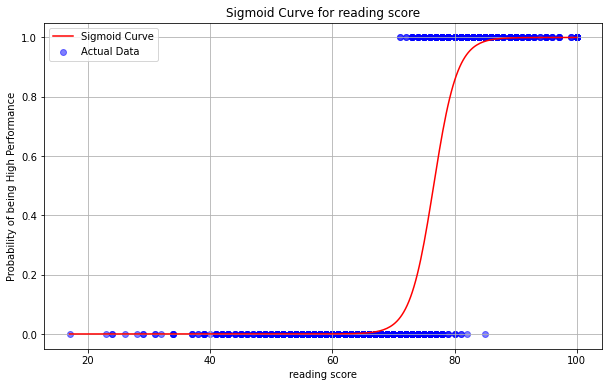

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Adjust the target variable for binary classification
y_binary = (y == 2).astype(int)

# Function to plot sigmoid curve for a given feature
def sigmoidcurve(X, y, feature_name):
    # Initialize and fit logistic regression
    model = LogisticRegression()
    model.fit(X[[feature_name]], y)
    
    # Predict probability for the range of feature values
    x_test = np.linspace(X[feature_name].min(), X[feature_name].max(), 300)
    y_prob = model.predict_proba(x_test[:, np.newaxis])[:, 1]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X[feature_name], y, color='blue', alpha=0.5, label='Actual Data')
    plt.plot(x_test, y_prob, color='red', label='Sigmoid Curve')
    plt.title(f'Sigmoid Curve for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Probability of being High Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot sigmoid curve for "reading score"
sigmoidcurve(X, y_binary, 'reading score')


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


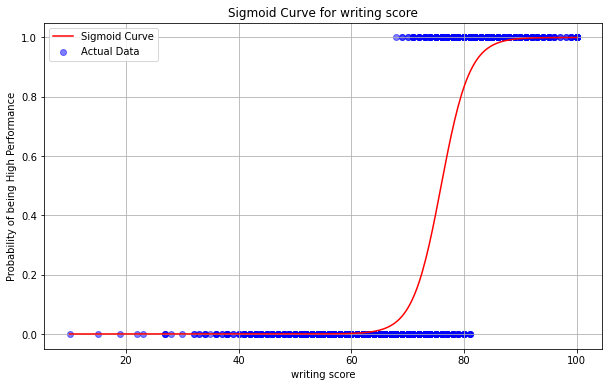

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


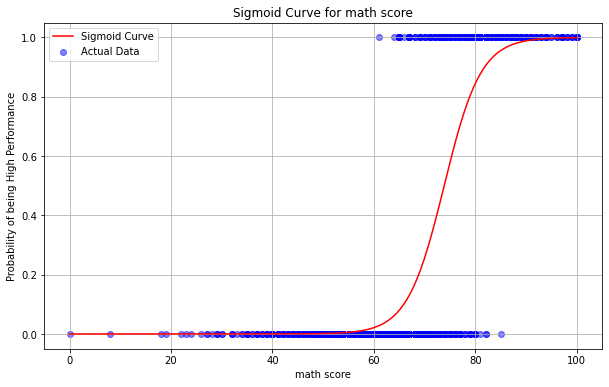

In [7]:
# Plot sigmoid curve for "writing score"
sigmoidcurve(X, y_binary, 'writing score')

# Plot sigmoid curve for "math score"
sigmoidcurve(X, y_binary, 'math score')


In [8]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data[['reading score', 'writing score', 'math score']]
y = data['performance']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((800, 3), (200, 3))

In [ ]:
# logistic Regression 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
import time

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2']
}

# Initialize the logistic regression model
log_reg = LogisticRegression(solver='saga', max_iter=5000, multi_class='ovr')

# Initialize GridSearchCV with k-fold cross-validation (5 folds by default)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Measure the time taken for the hyperparameter tuning process
start_time = time.time()

# Fit the model
grid_search.fit(X_train, y_train)

end_time = time.time()
time_taken = end_time - start_time

# Get the best parameters from the grid search
best_params = grid_search.best_params_

best_params, time_taken


In [ ]:
# ({'C': 0.001, 'penalty': 'l2'}, 18.521340131759644)

In [10]:
from sklearn.metrics import roc_auc_score, multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression


# Fit the logistic regression model using the best parameters
best_log_reg = LogisticRegression(C=0.001, penalty='l2', solver='saga', max_iter=5000, multi_class='ovr')
best_log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = best_log_reg.predict(X_test)
y_prob = best_log_reg.predict_proba(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate macro-average ROC AUC across the three classes
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')

accuracy, f1, roc_auc


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0.875, 0.8634022411553618, 0.9612593182738424)

In [13]:
# SVM 
from sklearn.svm import SVC

# Define the hyperparameters and their possible values for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV with k-fold cross-validation (5 folds by default)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', return_train_score=True)

# Measure the time taken for the hyperparameter tuning process
start_time_svm = time.time()

# Fit the model
grid_search_svm.fit(X_train, y_train)

end_time_svm = time.time()
time_taken_svm = end_time_svm - start_time_svm

# Get the best parameters from the grid search for SVM
best_params_svm = grid_search_svm.best_params_

best_params_svm, time_taken_svm


({'C': 10, 'gamma': 'scale', 'kernel': 'linear'}, 3.0425047874450684)

In [14]:
# Fit the SVM model using the best parameters on the training data
best_svm = SVC(C=10, gamma='scale', kernel='linear', probability=True)
best_svm.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)

# Calculate performance metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
roc_auc_svm = roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='macro')

accuracy_svm, f1_svm, roc_auc_svm


(1.0, 1.0, 1.0)

In [ ]:
# Decision TRee 

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters and their possible values for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with k-fold cross-validation (5 folds by default)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', return_train_score=True)

# Measure the time taken for the hyperparameter tuning process
starttime_dt = time.time()

# Fit the model
grid_search_dt.fit(X_train, y_train)

endtime_dt = time.time()
timetakendt = endtime_dt - start_time_dt

# Get the best parameters from the grid search for Decision Tree
bestparams_dt = grid_search_dt.best_params_

bestparams_dt, timetakendt


({'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.6362626552581787)

In [16]:
# Fit the Decision Tree model using the best parameters on the training data
best_dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
best_dt.fit(X_train, y_train)

# Predict on the test data
ypred_dt = best_dt.predict(X_test)
yprob_dt = best_dt.predict_proba(X_test)

# Calculate performance metrics for Decision Tree
accuracy_dt = accuracy_score(ytest, ypred_dt)
f1_dt = f1_score(ytest, ypred_dt, average='macro')
roc_auc_dt = roc_auc_score(y_test, yprob_dt, multi_class='ovr', average='macro')

accuracy_dt, f1_dt, roc_auc_dt


(0.945, 0.943917724570143, 0.9585232990866809)

In [22]:
# Create a dataframe with the performance metrics
performance_data = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
    'Accuracy': ['91.0%', '100%', '94.5%'],
    'F1-Score': ['93.94%', '100%', '94.39%'],
    'ROC AUC': ['99.988%', '100%', '95.85%']
}

performance_table = pd.DataFrame(performance_data)

# Display the table
performance_table


,Model,Accuracy,F1-Score,ROC AUC
0,Logistic Regression,91.0%,93.94%,99.988%
1,SVM,100%,100%,100%
2,Decision Tree,94.5%,94.39%,95.85%


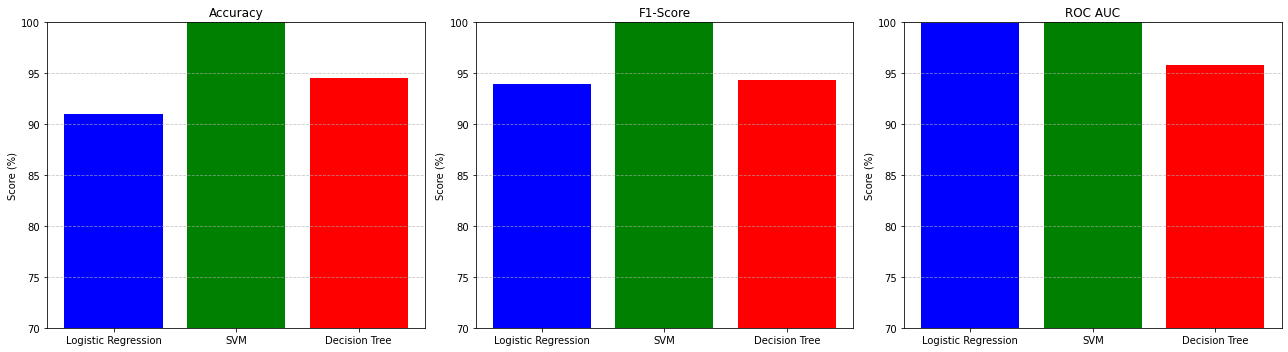

In [25]:
# # Convert the percentage strings to floats for plotting
# performance_data_float = {
#     'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
#     'Accuracy': [91.0, 100, 94.5],
#     'F1-Score': [93.94, 100, 94.39],
#     'ROC AUC': [99.988, 100, 95.85]
# }

# performance_df_float = pd.DataFrame(performance_data_float)

# # Plotting the performance metrics for each model
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# # Plotting Accuracy
# axes[0].bar(performance_df_float['Model'], performance_df_float['Accuracy'], color=['blue', 'green', 'red'])
# axes[0].set_title('Accuracy')
# axes[0].set_ylim(70, 100)
# axes[0].set_ylabel('Score (%)')
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# # Plotting F1-Score
# axes[1].bar(performance_df_float['Model'], performance_df_float['F1-Score'], color=['blue', 'green', 'red'])
# axes[1].set_title('F1-Score')
# axes[1].set_ylim(70, 100)
# axes[1].set_ylabel('Score (%)')
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# # Plotting ROC AUC
# axes[2].bar(performance_df_float['Model'], performance_df_float['ROC AUC'], color=['blue', 'green', 'red'])
# axes[2].set_title('ROC AUC')
# axes[2].set_ylim(70, 100)
# axes[2].set_ylabel('Score (%)')
# axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# # Display the plots
# plt.tight_layout()
# plt.show()
